###
 Najpierw załadujmy wszystko z plików

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

first_round = pd.read_csv("election_results_first_FINAL.csv")
second_round = pd.read_csv("election_results_second_FINAL.csv")

first_round = first_round[first_round['address'] != 'Unknown']
second_round = second_round[second_round['address'] != 'Unknown']

print(f"Pierwsza tura: {len(first_round)} wyników")
print(f"Druga tura: {len(second_round)} wyników")

Pierwsza tura: 31482 wyników
Druga tura: 32143 wyników


### Troche się różni, skrypt prawdopodobnie albo się pomylił lub rzeczywiście były zmiany :)


Tutaj najpierw zrobimy nie łącząc adresów obwodów


In [64]:
merged = pd.merge(first_round, second_round, on='address', suffixes=('_first', '_second'))

weird_trzaskowski = merged[merged['Trzaskowski_first'] > merged['Trzaskowski_second']]
print(f"Wyniki pierwszej tury, gdzie Trzaskowski ma więcej głosów niż w drugiej turze: {len(weird_trzaskowski)}")

print("Lokalizacje z anomalią:")
print(weird_trzaskowski[['address', 'Trzaskowski_first', 'Trzaskowski_second']])

weird_nawrocki = merged[merged['Nawrocki_first'] > merged['Nawrocki_second']]
print(f"Wyniki pierwszej tury, gdzie Nawrocki ma więcej głosów niż w drugiej turze: {len(weird_nawrocki)}")

print("Lokalizacje z anomalią:")
print(weird_nawrocki[['address', 'Nawrocki_first', 'Nawrocki_second']])

weird_trzaskowski.to_csv("weird_trzaskowski.csv", index=False)
weird_nawrocki.to_csv("weird_nawrocki.csv", index=False)
weird_trzaskowski.to_excel("weird_trzaskowski.xlsx", index=False)
weird_nawrocki.to_excel("weird_nawrocki.xlsx", index=False)




Wyniki pierwszej tury, gdzie Trzaskowski ma więcej głosów niż w drugiej turze: 2776
Lokalizacje z anomalią:
                                                 address  Trzaskowski_first  \
30     Szkoła Podstawowa Nr 4, ul. Bielska 5, 59-700 ...                452   
60          Dom Ludowy, Krępnica 29A, 59-700 Bolesławiec                147   
133    Szkoła Podstawowa nr 4 z Oddziałami Integracyj...                304   
142    Szkoła Podstawowa Nr 5 z Oddziałami Integracyj...                329   
175    Centrum Biblioteczno-Kulturalne, ul. Kolejowa ...                114   
...                                                  ...                ...   
39429  Samodzielny Publiczny Zakład Opieki Zdrowotnej...                 10   
39450  Dom Pomocy Społecznej, ul. Winiarska 26, 62-80...                 31   
39476  Zakład Leczniczy-Hospicjum Palium Uniwersyteck...                  8   
39511  Szpital Powiatowy w Gryfinie Sp. z o.o., ul. P...                  7   
39541  Przyjazny Szpita

a tu już połączymy adresami, wydaje mi się, że tak będzie lepiej

In [65]:
# Tutaj ważna sprawa, wiele obwodoów ma takie same adresy, a inne numery, bardzo często z tego co widzę też zmieniają pozniej ilosc tych obwodow itp, wiec ja po prostu polacze z jednego adresu i tyle

first_round = first_round.groupby('address').agg({
    'Trzaskowski': 'sum',
    "Nawrocki": 'sum',
}).reset_index()
second_round = second_round.groupby('address').agg({
    'Trzaskowski': 'sum',
    "Nawrocki": 'sum',
}).reset_index()

In [66]:
merged = pd.merge(first_round, second_round, on='address', suffixes=('_first', '_second'))

weird_trzaskowski = merged[merged['Trzaskowski_first'] > merged['Trzaskowski_second']]
print(f"Wyniki pierwszej tury, gdzie Trzaskowski ma więcej głosów niż w drugiej turze: {len(weird_trzaskowski)}")

print("Lokalizacje z anomalią:")
print(weird_trzaskowski[['address', 'Trzaskowski_first', 'Trzaskowski_second']])

weird_nawrocki = merged[merged['Nawrocki_first'] > merged['Nawrocki_second']]
print(f"Wyniki pierwszej tury, gdzie Nawrocki ma więcej głosów niż w drugiej turze: {len(weird_nawrocki)}")

print("Lokalizacje z anomalią:")
print(weird_nawrocki[['address', 'Nawrocki_first', 'Nawrocki_second']])

weird_trzaskowski.to_csv("weird_trzaskowski_sum.csv", index=False)
weird_nawrocki.to_csv("weird_nawrocki_sum.csv", index=False)
weird_trzaskowski.to_excel("weird_trzaskowski_sum.xlsx", index=False)
weird_nawrocki.to_excel("weird_nawrocki_sum.xlsx", index=False)




Wyniki pierwszej tury, gdzie Trzaskowski ma więcej głosów niż w drugiej turze: 934
Lokalizacje z anomalią:
                                                 address  Trzaskowski_first  \
1      "Acherówka", ul. Walerego Sławka 2, 02-495 War...                686   
21     "NAZARET" Dom Pomocy Społecznej Zgromadzenia S...                  9   
32     "Szpital Powiatowy w Jarocinie" Sp. z o.o., ul...                 14   
46     116 Szpital Wojskowy z Przychodnią SP ZOZ w Op...                 20   
48     21 Wojskowy Szpital Uzdrowiskowo-Rehabilitacyj...                172   
...                                                  ...                ...   
27680  Świetlica wiejska, Nowa Wieś ul. Główna 52B, 0...                691   
28084  Świetlica środowiskowa, ul. Zatoczna 34, 72-41...                532   
28213  Świetlica, ul. Racula-Głogowska 64, 66-004 Zie...                854   
28307  Żłobek nr 45, ul. Mieczysława Pawlikowskiego 2...                733   
28309  Żłobek nr 74, ul.

### UWAGA

## Zachęcam do zabawy i analizy tych wyników, na końcu dnia wspomnijcie tylko o źródle ;), na dole jakieś moje pomysly ale nie jestem statystkiem, nie wiem jak to sie ma do rzeczywistości, pozdrawiam


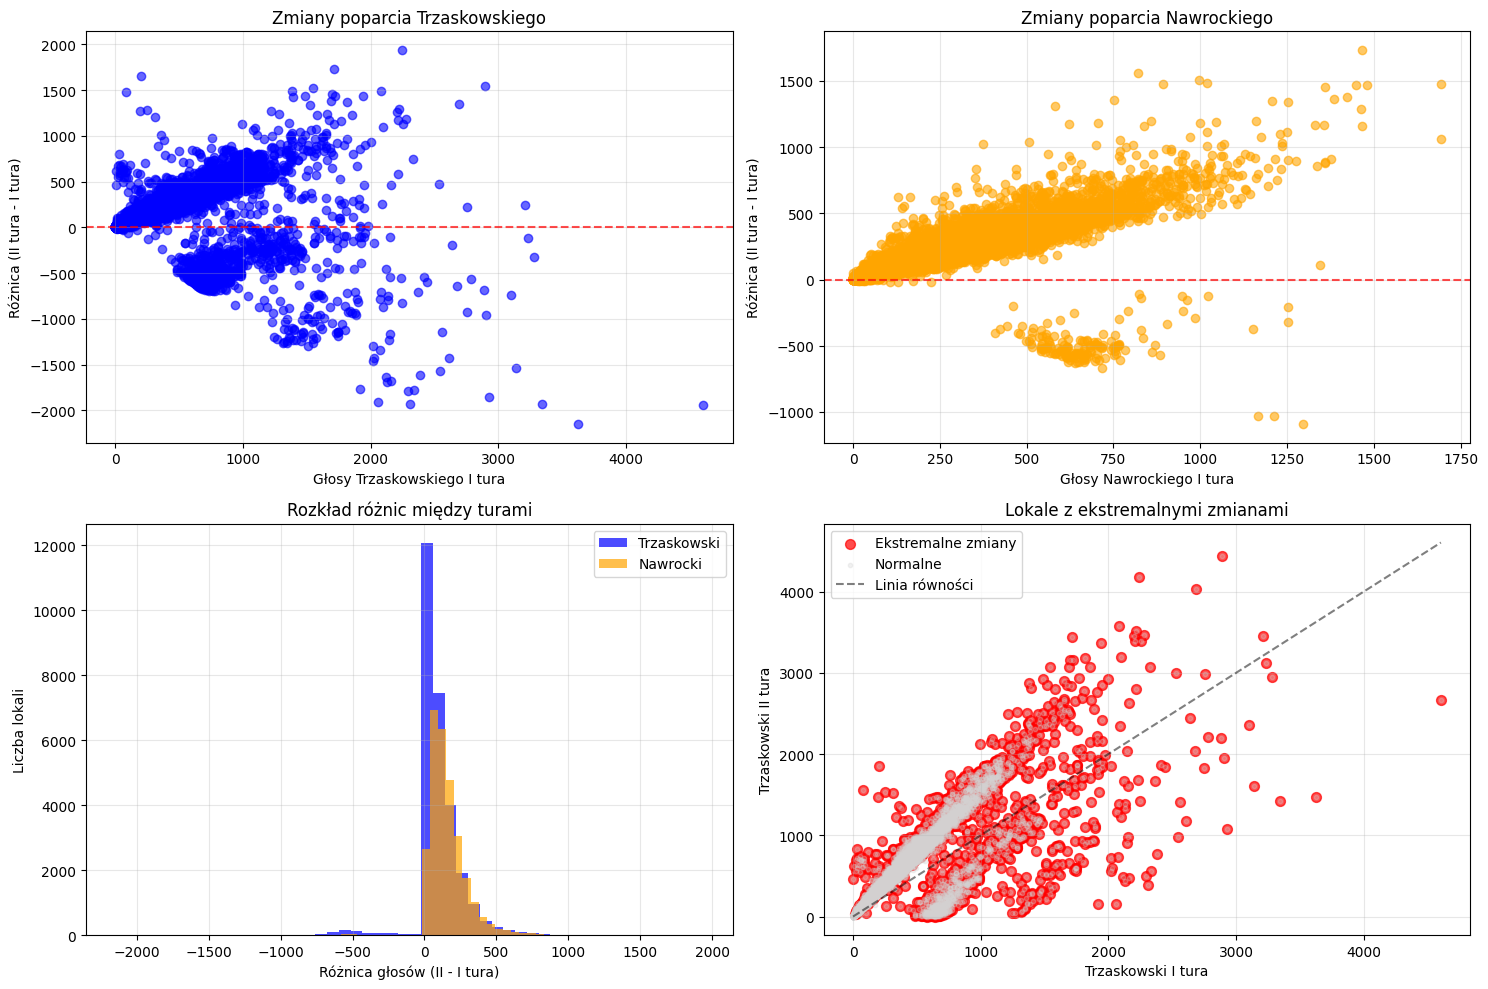

TOP 10 największych spadków Trzaskowskiego:
                                                                                                                address  Trzaskowski_first  Trzaskowski_second
11756                                               Szkoła Podstawowa Nr 12, Gdańsk ul. Człuchowska 6, 80-180 Gdańsk 42               3623                1475
12054               Szkoła Podstawowa Nr 2 z Oddziałami Sportowymi, Gdańsk ul. Heleny Marusarzówny 10, 80-288 Gdańsk 44               4605                2660
14241                                                          Szkoła Podstawowa nr 118, bulw. Ikara 19, 54-130 Wrocław               3345                1418
20808                                                Zespół Szkolno-Przedszkolny nr 3, ul. Nagietkowa 73, 81-589 Gdynia               2310                 386
20640                                  Zespół Szkolno-Przedszkolny Nr 8, Gdańsk ul. Marcina Dragana 2, 80-807 Gdańsk 20               2059                 154
20

In [67]:
#plotting 
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
trzask_diff = merged['Trzaskowski_second'] - merged['Trzaskowski_first']
plt.scatter(merged['Trzaskowski_first'], trzask_diff, alpha=0.6, c='blue')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Głosy Trzaskowskiego I tura')
plt.ylabel('Różnica (II tura - I tura)')
plt.title('Zmiany poparcia Trzaskowskiego')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
nawrocki_diff = merged['Nawrocki_second'] - merged['Nawrocki_first']
plt.scatter(merged['Nawrocki_first'], nawrocki_diff, alpha=0.6, c='orange')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Głosy Nawrockiego I tura')
plt.ylabel('Różnica (II tura - I tura)')
plt.title('Zmiany poparcia Nawrockiego')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.hist(trzask_diff, bins=50, alpha=0.7, label='Trzaskowski', color='blue')
plt.hist(nawrocki_diff, bins=50, alpha=0.7, label='Nawrocki', color='orange')
plt.xlabel('Różnica głosów (II - I tura)')
plt.ylabel('Liczba lokali')
plt.title('Rozkład różnic między turami')
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(2, 2, 4)

extreme_changes = merged[
    (abs(trzask_diff) > trzask_diff.std() * 2) | 
    (abs(nawrocki_diff) > nawrocki_diff.std() * 2)
].reset_index()
extreme_changes.to_csv("extreme_changes.csv", index=False)
extreme_changes.to_excel("extreme_changes.xlsx", index=False)

plt.scatter(extreme_changes['Trzaskowski_first'], extreme_changes['Trzaskowski_second'], 
           c='red', s=50, alpha=0.7, label='Ekstremalne zmiany')
plt.scatter(merged['Trzaskowski_first'], merged['Trzaskowski_second'], 
           c='lightgray', s=10, alpha=0.3, label='Normalne')
plt.plot([0, merged['Trzaskowski_first'].max()], [0, merged['Trzaskowski_first'].max()], 
         'k--', alpha=0.5, label='Linia równości')
plt.xlabel('Trzaskowski I tura')
plt.ylabel('Trzaskowski II tura')
plt.title('Lokale z ekstremalnymi zmianami')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Pokaż konkretne lokale z największymi różnicami
print("TOP 10 największych spadków Trzaskowskiego:")
biggest_drops = merged.loc[trzask_diff.nsmallest(10).index]
print(biggest_drops[['address', 'Trzaskowski_first', 'Trzaskowski_second']].to_string())

print("\nTOP 10 największych wzrostów Trzaskowskiego:")
biggest_gains = merged.loc[trzask_diff.nlargest(10).index]
print(biggest_gains[['address', 'Trzaskowski_first', 'Trzaskowski_second']].to_string())

print("\nTOP 10 największych spadków Nawrockiego:")
biggest_drops_nawrocki = merged.loc[nawrocki_diff.nsmallest(10).index]
print(biggest_drops_nawrocki[['address', 'Nawrocki_first', 'Nawrocki_second']].to_string())
print("\nTOP 10 największych wzrostów Nawrockiego:")
biggest_gains_nawrocki = merged.loc[nawrocki_diff.nlargest(10).index]
print(biggest_gains_nawrocki[['address', 'Nawrocki_first', 'Nawrocki_second']].to_string())

In [68]:
# Analiza statystyczna - Prawo Benforda 
def benford_analysis(data, column):
    first_digits = data[column].astype(str).str[0].astype(int)
    first_digits = first_digits[first_digits > 0]  # usuń zera
    
    observed = first_digits.value_counts().sort_index()
    expected_benford = [np.log10(1 + 1/d) for d in range(1, 10)]
    
    print(f"Analiza Benforda dla {column}:")
    for digit in range(1, 10):
        obs_pct = observed.get(digit, 0) / len(first_digits) * 100
        exp_pct = expected_benford[digit-1] * 100
        print(f"Cyfra {digit}: Obserwowane {obs_pct:.1f}%, Oczekiwane {exp_pct:.1f}%")
        
# Sprawdzenie niezwykłych skoków w poparciu
def detect_unusual_swings(merged_data):
    trzask_swing = merged_data['Trzaskowski_second'] - merged_data['Trzaskowski_first']
    nawrocki_swing = merged_data['Nawrocki_second'] - merged_data['Nawrocki_first']
    
    # Podejrzane skoki > 3 odchylenia standardowe
    unusual_trzask = merged_data[abs(trzask_swing) > 3 * trzask_swing.std()]
    unusual_nawrocki = merged_data[abs(nawrocki_swing) > 3 * nawrocki_swing.std()]
    
    print(f"Podejrzane skoki Trzaskowski: {len(unusual_trzask)}")
    print(f"Podejrzane skoki Nawrocki: {len(unusual_nawrocki)}")
    
    return unusual_trzask, unusual_nawrocki

# Analiza korelacji między kandydatami (negatywna korelacja jest naturalna)
correlation = np.corrcoef(merged['Trzaskowski_second'], merged['Nawrocki_second'])[0,1]
print(f"Korelacja między kandydatami w II turze: {correlation:.3f}")
    
# Uruchom analizy
benford_analysis(merged, 'Trzaskowski_second')
benford_analysis(merged, 'Nawrocki_second')

unusual_trzask, unusual_nawrocki = detect_unusual_swings(merged)

Korelacja między kandydatami w II turze: 0.723
Analiza Benforda dla Trzaskowski_second:
Cyfra 1: Obserwowane 25.4%, Oczekiwane 30.1%
Cyfra 2: Obserwowane 14.9%, Oczekiwane 17.6%
Cyfra 3: Obserwowane 13.0%, Oczekiwane 12.5%
Cyfra 4: Obserwowane 11.5%, Oczekiwane 9.7%
Cyfra 5: Obserwowane 9.8%, Oczekiwane 7.9%
Cyfra 6: Obserwowane 8.1%, Oczekiwane 6.7%
Cyfra 7: Obserwowane 6.8%, Oczekiwane 5.8%
Cyfra 8: Obserwowane 5.7%, Oczekiwane 5.1%
Cyfra 9: Obserwowane 4.8%, Oczekiwane 4.6%
Analiza Benforda dla Nawrocki_second:
Cyfra 1: Obserwowane 24.4%, Oczekiwane 30.1%
Cyfra 2: Obserwowane 19.3%, Oczekiwane 17.6%
Cyfra 3: Obserwowane 16.2%, Oczekiwane 12.5%
Cyfra 4: Obserwowane 12.5%, Oczekiwane 9.7%
Cyfra 5: Obserwowane 9.0%, Oczekiwane 7.9%
Cyfra 6: Obserwowane 6.4%, Oczekiwane 6.7%
Cyfra 7: Obserwowane 4.8%, Oczekiwane 5.8%
Cyfra 8: Obserwowane 3.9%, Oczekiwane 5.1%
Cyfra 9: Obserwowane 3.6%, Oczekiwane 4.6%
Podejrzane skoki Trzaskowski: 852
Podejrzane skoki Nawrocki: 1318
